In [1]:
import numpy as np 
import pandas as pd
from PIL import Image

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                                sheet_name='Canada by Citizenship',
                                skiprows=range(20),
                                skipfooter=2)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
#melakukan beberapa modifikasi pada dataset asli guna mempermudah pembuatan visualilasi
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)
df_can.rename (columns = {'OdName' : 'Country',
'AreaName':'Continent','RegName':'Region'}, inplace = True)
df_can.column = list(map(str, df_can.columns))
df_can.set_index('Country', inplace = True)
df_can['Total'] = df_can.sum (axis = 1)
years = list(map(str, range(1980, 2014)))
print ('data dimension:', df_can.shape)

data dimension: (195, 38)


C:\Users\USER\AppData\Local\Temp\ipykernel_13792\3518857644.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_can.column = list(map(str, df_can.columns))
C:\Users\USER\AppData\Local\Temp\ipykernel_13792\3518857644.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum (axis = 1)


In [6]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.6.0


Waffle Charts

In [7]:
#membuat dataframe baru untuk tiga negara
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

#melihat dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [8]:
#saat ingin membuat waffle charts
#1. menentukan proporsi setiap kategori beserta totalnya
#menghitung total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

#print proporsi
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ':' + str(proportion))

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744


In [9]:
#2. menentukan ukuran keseluruhan waffle chart
width = 40
height = 10

total_num_tiles = width * height 

print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [10]:
#3. menggunakan proporsi tiap kategori u/ menentukan jumlah ubin 
#menghitung jumlah ubin dari masing-masing kategori
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

#menampilkan jumlah ubin per kategori
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


In [11]:
#4. membuat matriks kemudian mengisinya 
waffle_chart = np.zeros((height, width))

category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1

        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1

        waffle_chart[row, col] = category_index

print('Waffle chart populated!')

Waffle chart populated!


In [12]:
#melihat tampilan matkrisnya
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 640x480 with 0 Axes>

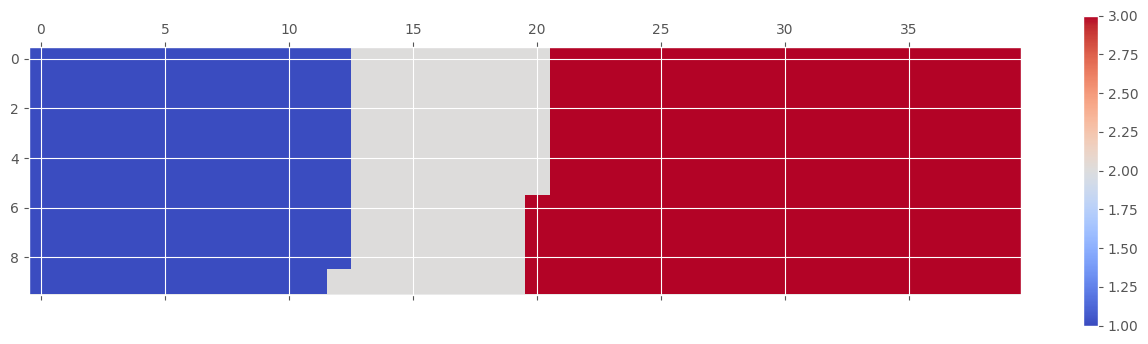

In [13]:
#memetakan matriks waffle chart menjadi visual
#membuat figure object baru
fig = plt.figure()

#menggunakan matshow untuk menampilkan waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 640x480 with 0 Axes>

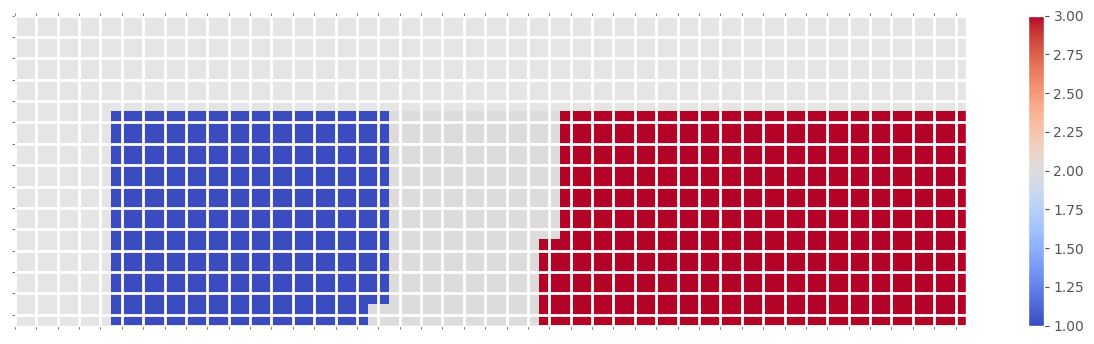

In [14]:
fig = plt.figure()
#menampilkan waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
 #mendapatkan axis
ax = plt.gca()
#mengatur minor ticks
ax.set_xticks(np.arange(-5, (width), 1), minor=True)
ax.set_yticks(np.arange(-5, (height), 1), minor=True)
#menambahkan gridlines di minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 640x480 with 0 Axes>

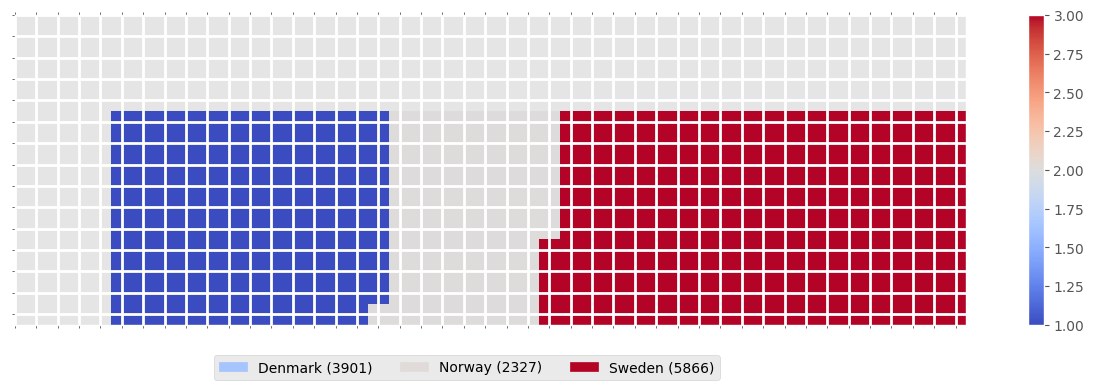

In [16]:
#menambahkan legend(keterangan)
fig = plt.figure()
#menampilkan waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
 #mendapatkan axis
ax = plt.gca()
#mengatur minor ticks
ax.set_xticks(np.arange(-5, (width), 1), minor=True)
ax.set_yticks(np.arange(-5, (height), 1), minor=True)
#menambahkan gridlines di minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

#menghitung jumlah komulatif dari masing-masing kategori untuk mencocokan warna antaran chart dan legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

#membuat legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

#menambahkan legend ke chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
           )

Word Clouds

In [79]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported')


Wordcloud is installed and imported


In [99]:
#download file dan simpan sebagai alice_novel.txt
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O alice_novel.txt

#membuka file dan membaca file
alice_novel = open('alice_novel.txt', 'r').read()

print ('File downloaded and saved!')

File downloaded and saved!


In [100]:
#menggunakan set untuk menghapus stopword yang berlebihan
stopwords = set(STOPWORDS)

In [101]:
#membuat word cloud object dan generate word cloud
#disini kita hanya menggunakan 2000 kata pertama dalam novel
#membuat word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

#generate the word cloud
alice_wc.generate(alice_novel)



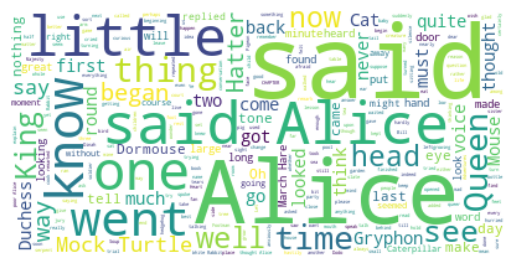

In [102]:
#men-visualisasikan word cloud yang sudah dibuat
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

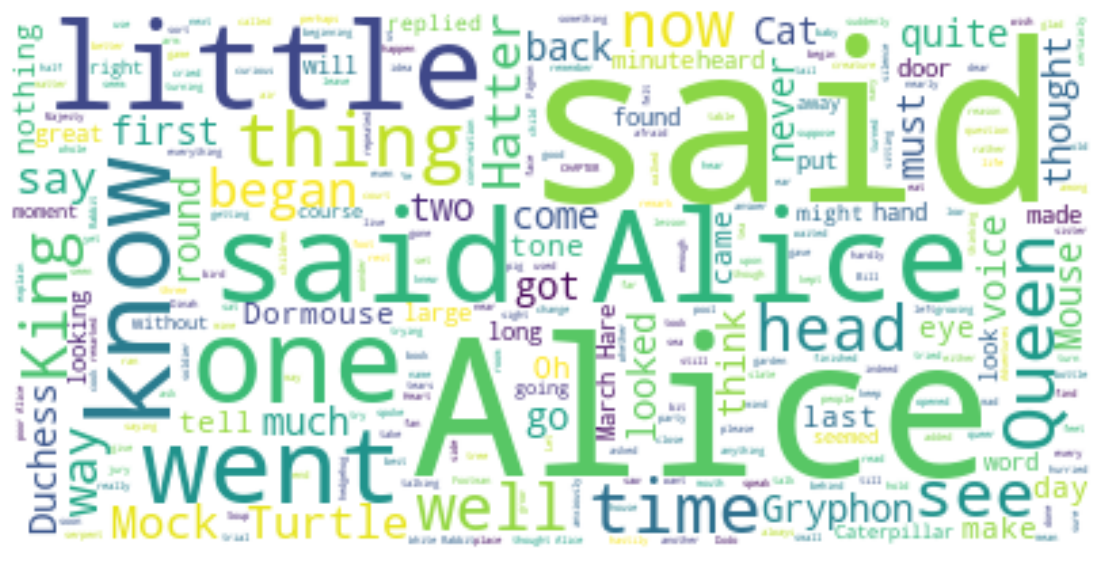

In [103]:
#memperbesar ukurannya
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


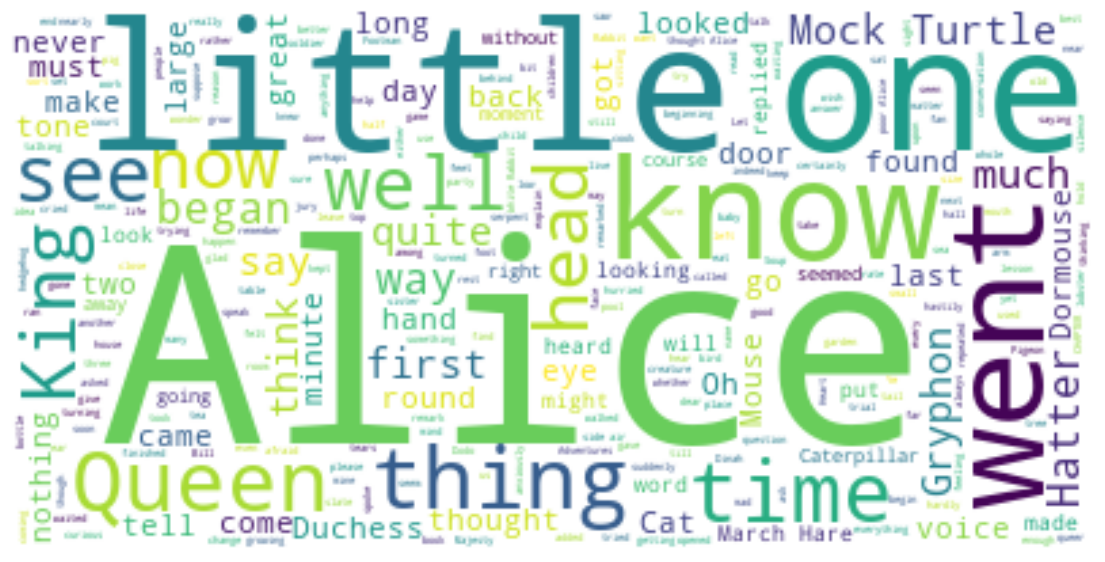

In [104]:
#membuang suatu kata
#disini kita akan membuang said karena said bukanlah kata yang infromatif
stopwords.add('said') #menambahkan kata said ke stopwords

alice_wc.generate(alice_novel) #membuat ulang word cloud

#menampilkan cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()



In [106]:
#memasukkan atau membuat word cloud ke dalam sebuah gambar
#mendownload gambar
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_mask.png -O alice_mask.png

#menyimpan gambar
alice_mask = np.array(Image.open('alice_mask.png'))

print('Image downloaded and saved!')


Image downloaded and saved!


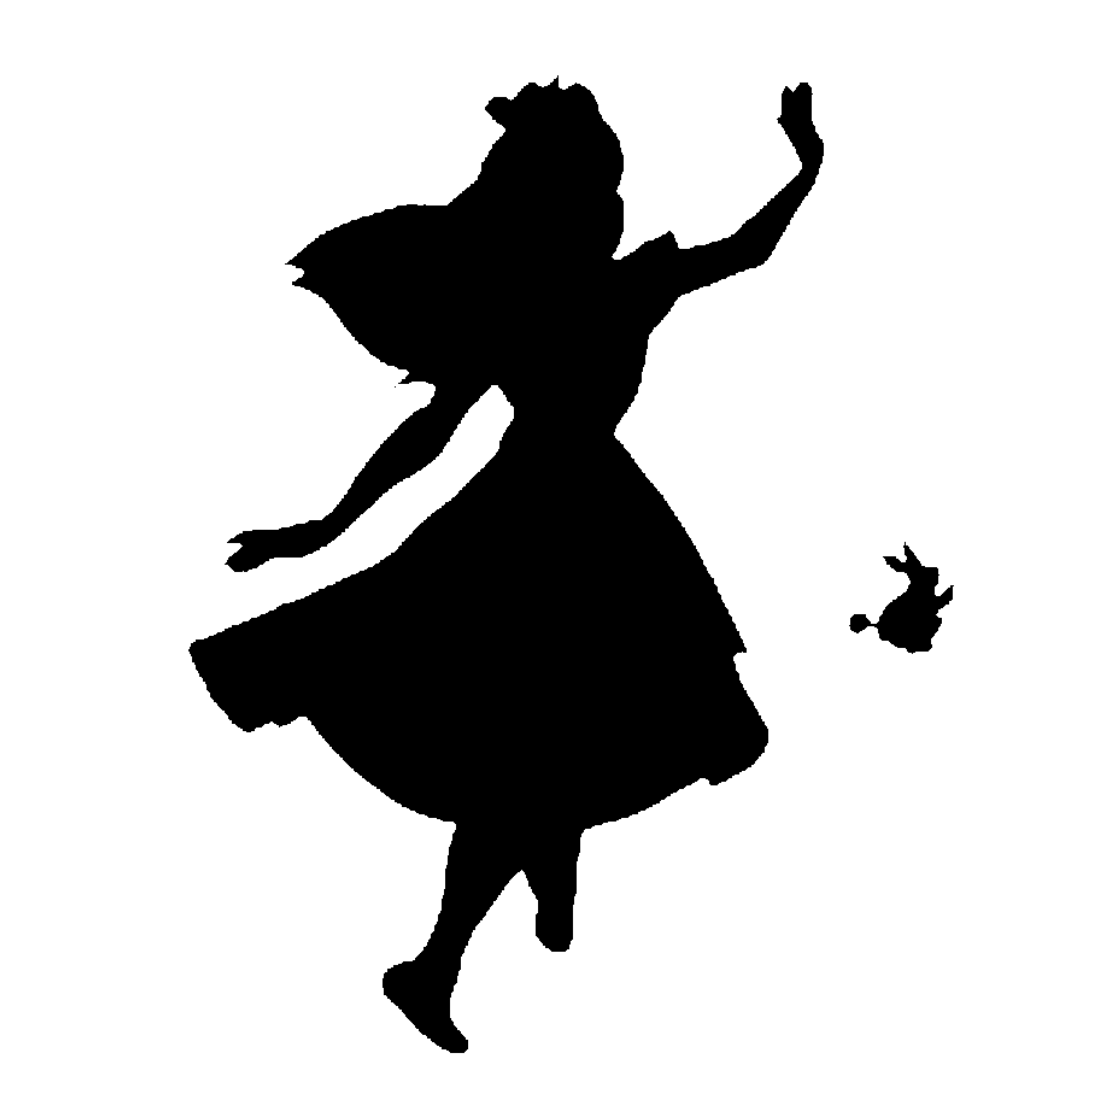

In [108]:
#menampilkan gambar 
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

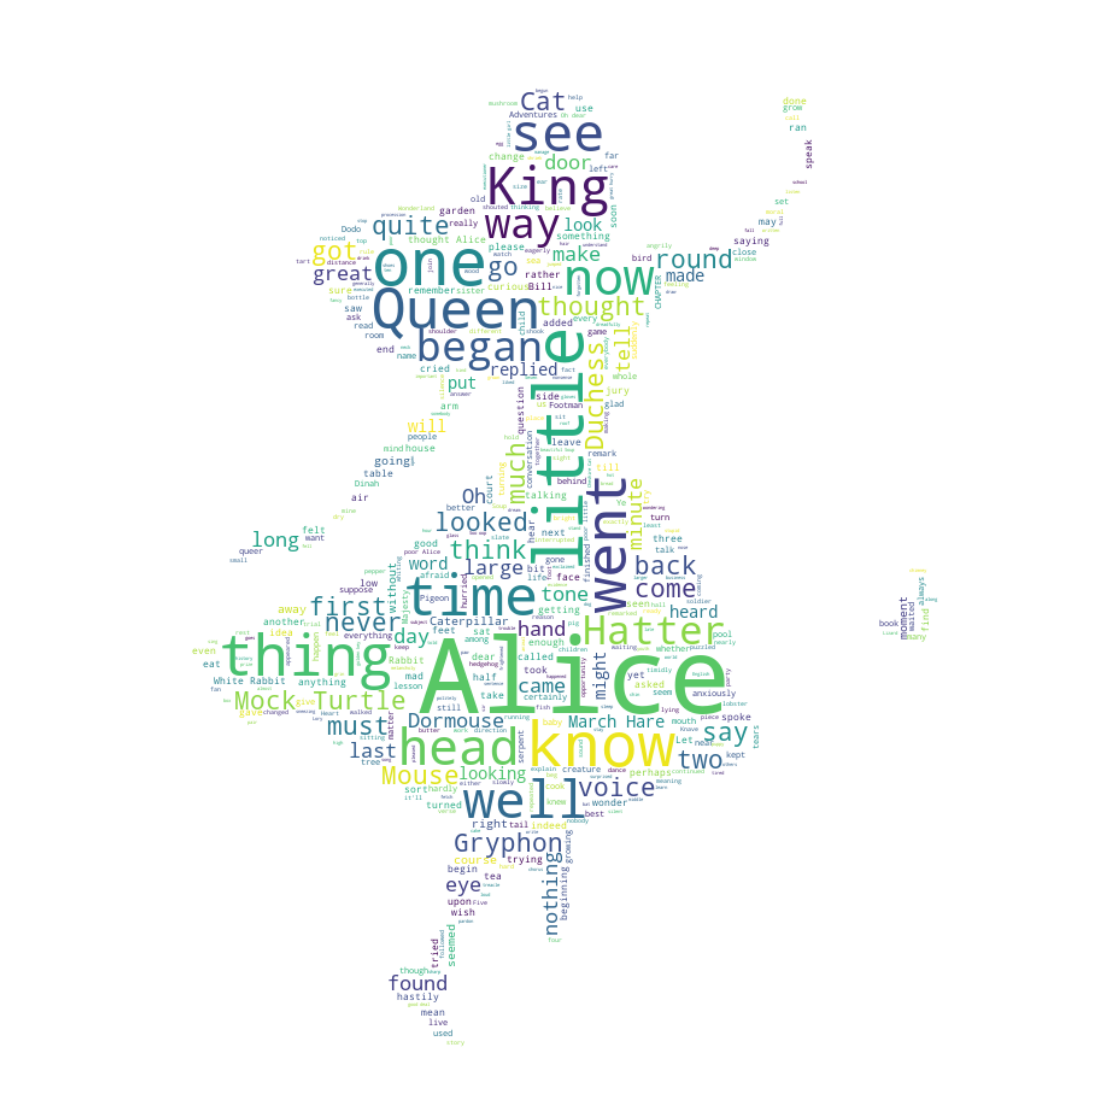

In [112]:
#membuat word cloud, dengan 2000 kata pertama 
alice_wc = WordCloud(background_color='white', 
                     max_words=2000, 
                     mask=alice_mask, 
                     stopwords=stopwords
                    )

#generate the word cloud
alice_wc.generate(alice_novel)

#menampilkan word cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Regression Plots

In [115]:
#men-install dan menginport seaborn terlebih dahulu
!pip install seaborn

import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!
